#Exploratory Analysis

# Table of Content
1. [Introduction](#Introduction)
2. [Retrieving Data](#retrieving_data)
3. [Data Overview](#overview): [Train Data](#train), [Test Data](#test), [Bureua Balance](#bureau), [Credit Card Balance](#credit_balance), [Payment Installment](#installments), [Previous Applications](#previous)
4. [Exploring Target Variable](#target): [Target Variable Balance](#balance), [Family, Gender, & Income](#fgia), [Loan Distribution](#distribution), [Accuracy](#accuracy), [Variance](#variance), [Categorical Variables](#cat), [Outliers](#outlier), [Correlation](#correlation)
5. [Missing Data](#mdo): [Missing Data Check](#mdc), [Impute Missing Data](#impute_missing), [Drop Columns](#drop_col)
6. [Joining Datasets](#join)
7. [Results](#results)
8. [Appendix](#appendix)




## <a name = "Introduction"> 1. Introduction</a>

Home Credit Group’s business model is to address the financial challenges faced by individuals with insufficient or non-existent credit histories. We recognized that this underserved population often falls victim to untrustworthy lenders. Home Credit is committed to providing a positive and safe borrowing experience, with the aim of broadening financial inclusion. To achieve this goal, they currently leverage alternative data sources, such as telco and transactional information, to assess the repayment abilities of their clients. However, they believe that there is untapped potential in their data.

To unlock their full potential, we will aim to optimize the data analysis techniques and algorithms by leveraging available data to identify clients capable of repayment. This will prevent unnecessary rejections, increase the rate of correct rejection, and provide loans to suitable parties. This project will support current prediction methods and provide a precise prediction model, based on additional analytics by employing various statistical and machine learning techniques to make accurate predictions.

## <a name = "retrieving_data">2. Retrieving data</a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/home-credit-default-risk/'

## <a name = "overview">3. Data Overview</a>

The Home Credit dataset is based on a real-world situation, provided by Home Credit. The dataset contains several tables with huge amount of data which has information about the loan applicant, credit scores of an applicant, their repayment history. The aim of this dataset is to create a predictive model that can accurately gauge the likelihood of loan default by the new applicants.


#### <a name = "train"> Application Train Dataset Overview </a>

In [ ]:
application_train = pd.read_csv(folder_path+'application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_train.shape

(307511, 122)

In [ ]:
column_names = application_train.columns
data_types = application_train.dtypes
for column_names, data_types in zip(column_names, data_types):
    print(column_names, "  ", data_types)

SK_ID_CURR    int64
TARGET    int64
NAME_CONTRACT_TYPE    object
CODE_GENDER    object
FLAG_OWN_CAR    object
FLAG_OWN_REALTY    object
CNT_CHILDREN    int64
AMT_INCOME_TOTAL    float64
AMT_CREDIT    float64
AMT_ANNUITY    float64
AMT_GOODS_PRICE    float64
NAME_TYPE_SUITE    object
NAME_INCOME_TYPE    object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS    object
NAME_HOUSING_TYPE    object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH    int64
DAYS_EMPLOYED    int64
DAYS_REGISTRATION    float64
DAYS_ID_PUBLISH    int64
OWN_CAR_AGE    float64
FLAG_MOBIL    int64
FLAG_EMP_PHONE    int64
FLAG_WORK_PHONE    int64
FLAG_CONT_MOBILE    int64
FLAG_PHONE    int64
FLAG_EMAIL    int64
OCCUPATION_TYPE    object
CNT_FAM_MEMBERS    float64
REGION_RATING_CLIENT    int64
REGION_RATING_CLIENT_W_CITY    int64
WEEKDAY_APPR_PROCESS_START    object
HOUR_APPR_PROCESS_START    int64
REG_REGION_NOT_LIVE_REGION    int64
REG_REGION_NOT_WORK_REGION    int64
LIVE_REGION_NOT_WORK_REGION    int64
REG_CITY_N

**Application train|test:** The key details about loan applicants are shown in this table. Each column in the table contains information about the applicant's financial situation, credit history, and other factors. Each row represents a single loan application.

#### <a name = "test"> Application Test Dataset Overview </a>

In [ ]:
test_application = pd.read_csv(folder_path+'application_test.csv')
print(test_application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


In [ ]:
test_application.head() #dataframe overview

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### <a name = "bureau1"> Bureau Dataset Overview </a>

In [ ]:
bureau = pd.read_csv(folder_path+'bureau.csv')
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


**Bureau:** Data from other financial institutions where the loan applicant has previously taken loans is included in this table. It offers further information about the applicant's credit history.

#### <a name = "bureau"> Bureau Balance Dataset Overview </a>

In [ ]:
bureau_balance = pd.read_csv(folder_path+'bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bureau_balance.shape

(27299925, 3)

**Bureau Balance:** This table contains monthly data regarding the prior loans listed in the bureau.csv file. Each loan account's condition for the month is shown, including the amount of credit still available, the number of past-due days, etc.

#### <a name = "credit_balance">Credit Card Balance Dataset Overview</a>

In [ ]:
credit_card_balance = pd.read_csv(folder_path+"credit_card_balance.csv")
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


**Credit Card Balance:** Monthly information about the prior credit cards that the applicants have used is provided in this table. It contains details about the payment history, credit limits, and balances.

#### <a name = "installments">Installments Payments Dataset Overview</a>

In [ ]:
installments = pd.read_csv(folder_path+"installments_payments.csv")
installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**Installments:** The applicants' prior installments are listed in detail in the following table. It contains the payment amount as well as the actual and due dates.

#### <a name = "previous">Previous Application Dataset Overview</a>

In [ ]:
previous_app = pd.read_csv(folder_path+"previous_application.csv")
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**Previous Application:** The prior loan applications submitted by Home Credit's loan applicants are listed in this table. It contains information on the contract type, application outcome, and loan amount.

## <a name = "target">4. Explore the Target Variables</a>


In [ ]:
#this gives us a descriptive analysis of numeric variables
desc = application_train.describe()
desc

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Looking at the above data summary, what's the appropriate measurement? Is mean the correct measurement for count_children? Therefore, calculating median, and z-score may help us determine the correct value to replace possible null values.

#### <a name = "balance">Is the Data Balanced or Imbalanced?</a>

In [ ]:
temp = application_train["TARGET"].value_counts()
target_count = pd.DataFrame({'labels': temp.index,
                            'values': temp.values})
target_count

,labels,values
0,0,282686
1,1,24825


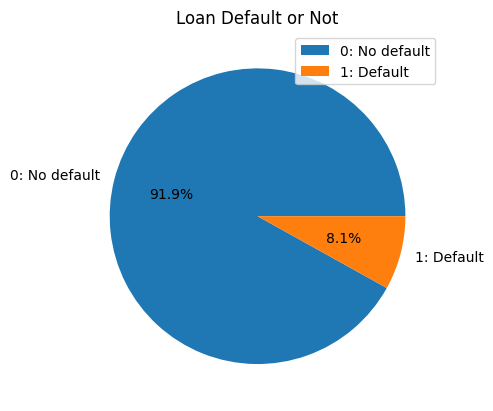

In [ ]:
#plot target
default = ["0: No default", "1: Default"]
plt.pie(temp, labels =default, autopct='%1.1f%%')
plt.title("Loan Default or Not")
plt.legend()
plt.show()

As we can see above, the data is highly imbalanced. This is expected given Home Credit's business model. Defaults should be significantly fewer than non defaults.

#### <a name = "fgia"> Family, Gender, & Income Analysis </a>

In [ ]:
#create pivot table to loan default based on family status and gender
family_status = application_train.pivot_table(index = ["NAME_FAMILY_STATUS"],
                                      columns= ["TARGET", "CODE_GENDER"],
                                      values = 'SK_ID_CURR', aggfunc="count")
print(family_status)

TARGET                       0                     1        
CODE_GENDER                  F        M  XNA       F       M
NAME_FAMILY_STATUS                                          
Civil marriage         19016.0   7797.0  1.0  1753.0  1208.0
Married               114121.0  67458.0  3.0  8324.0  6526.0
Separated              14416.0   3734.0  NaN  1045.0   575.0
Single / not married   26364.0  14623.0  NaN  2220.0  2237.0
Unknown                    1.0      1.0  NaN     NaN     NaN
Widow                  14360.0    791.0  NaN   828.0   109.0


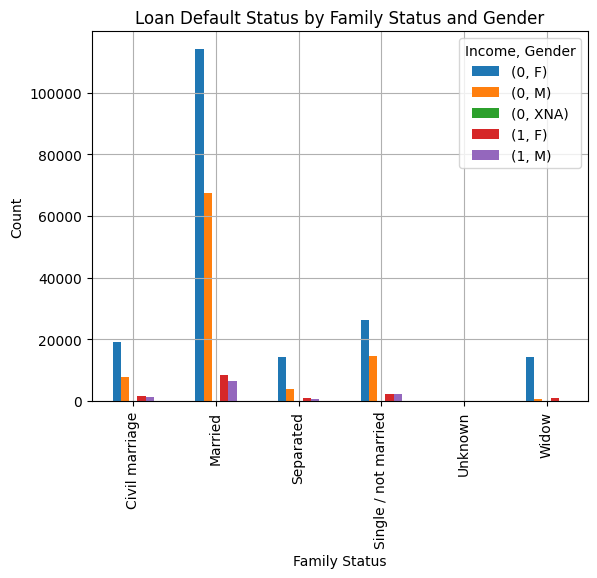

In [ ]:
family_status.plot(kind='bar', stacked = False)
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.title('Loan Default Status by Family Status and Gender')
plt.legend(title = 'Income, Gender')
plt.grid(True)
plt.show()

On the above table and visual, we can see that there are null values on our data where the customer refused to provide the gender and which family status they fall under. We can determine the gender based on the other information provided or we can use 'mode' of the column to replace it.

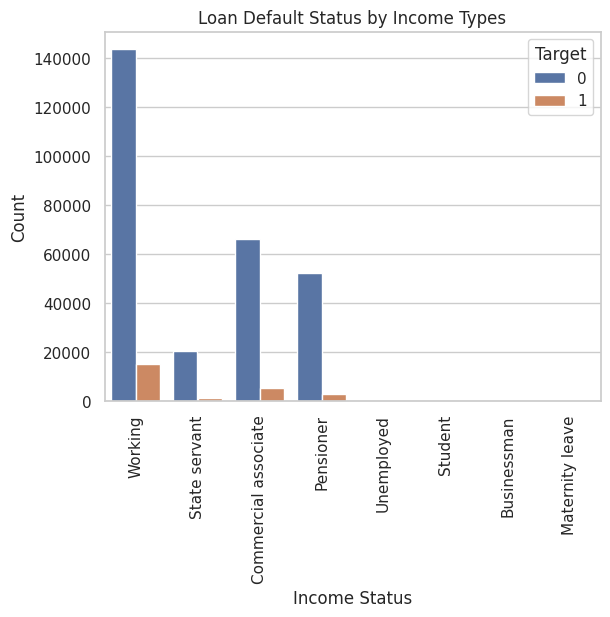

In [ ]:
#Loan default by income type
sns.set(style="whitegrid")
income = sns.countplot(x='NAME_INCOME_TYPE', hue = 'TARGET',
                       data = application_train)
plt.xlabel('Income Status')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Loan Default Status by Income Types')
plt.legend(title = 'Target')
plt.show()

In [ ]:
#loan default status based on income type in table comformat
income_types = application_train.pivot_table(index = ["NAME_INCOME_TYPE"],
                                      columns= ["TARGET"],
                                      values = 'SK_ID_CURR', aggfunc="count")
income_types


TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,10.0,NaN
Commercial associate,66257.0,5360.0
Maternity leave,3.0,2.0
Pensioner,52380.0,2982.0
State servant,20454.0,1249.0
Student,18.0,NaN
Unemployed,14.0,8.0
Working,143550.0,15224.0


This shows on how loan default target is behaving based on the consumer's income type. As you can see above, 10% of 'working' defaulted on loans. 2 out of 3 maternity leave income type defaulted on the loan.

In [ ]:
#Loan default status based on loan type

loan_type = application_train.pivot_table(index = ["NAME_CONTRACT_TYPE"],
                                      columns= ["TARGET", ],
                                      values = 'SK_ID_CURR', aggfunc="count")
loan_type

TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,255011,23221
Revolving loans,27675,1604




#### <a name ="distribution"> Loan Distribution </a>

Text(0.5, 1.0, 'Distribution of Credit Amount')

<Figure size 1200x500 with 0 Axes>

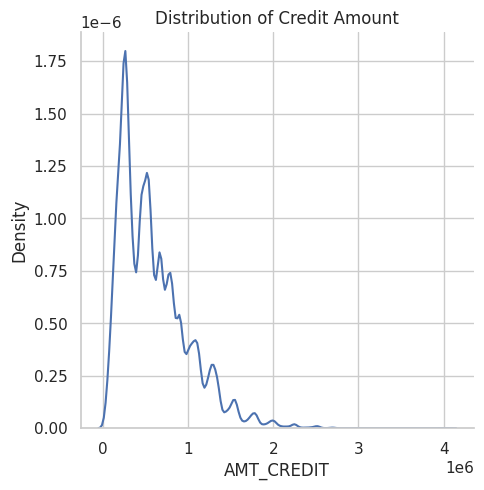

In [ ]:
#Distribution of Credit Amount of the loan
plt.figure(figsize=(12,5))
sns.displot(data=application_train, x = "AMT_CREDIT", kind = 'kde')
plt.title("Distribution of Credit Amount")


Text(0.5, 1.0, 'Distribution of Loan Annuity')

<Figure size 1200x500 with 0 Axes>

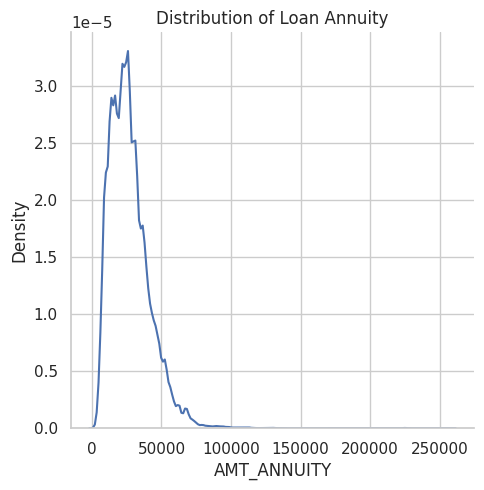

In [ ]:
#Distribution of Loan Annuity
plt.figure(figsize=(12,5))
sns.displot(data=application_train, x = "AMT_ANNUITY", kind = 'kde')
plt.title("Distribution of Loan Annuity")

Text(0.5, 1.0, 'Distribution of Price of the Loan')

<Figure size 1200x500 with 0 Axes>

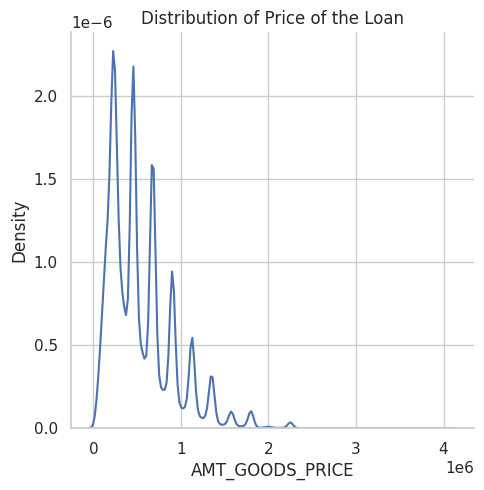

In [ ]:
#Distribution of Price of the Loan: for consumer loans, it is the price of the goods for which the loan is given
plt.figure(figsize=(12,5))
sns.displot(data=application_train, x = "AMT_GOODS_PRICE", kind = 'kde')
plt.title("Distribution of Price of the Loan")

#### <a name ="accuracy">Accuracy - Using majority class classifier</a>

In [ ]:
Total_count=application_train['TARGET'].count()
target_zero_count= application_train['TARGET'].value_counts()[0]
target_one_count= application_train['TARGET'].value_counts()[1]
accuracy = max(target_zero_count,target_one_count)*100/Total_count
print(np.round(accuracy, 2))

91.93


#### <a name = "variance">Variance</a>

In [ ]:
# Calculate the variance for each column
variance = application_train.var().sort_values(ascending= True)

# Print the variance for each column
print(variance)

FLAG_MOBIL          3.251916e-06
FLAG_DOCUMENT_12    6.503811e-06
FLAG_DOCUMENT_10    2.276297e-05
FLAG_DOCUMENT_2     4.227326e-05
FLAG_DOCUMENT_4     8.129156e-05
                        ...     
SK_ID_CURR          1.056582e+10
DAYS_EMPLOYED       1.995884e+10
AMT_INCOME_TOTAL    5.622739e+10
AMT_GOODS_PRICE     1.364907e+11
AMT_CREDIT          1.619988e+11
Length: 106, dtype: float64


<ipython-input-31-3c528bb9c050>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = application_train.var().sort_values(ascending= True)


In [ ]:
# Columns with near zero variance
zero_variance_columns = variance[variance <0.001 ].index
print(zero_variance_columns)

Index(['FLAG_MOBIL', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_4', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_19'],
      dtype='object')


In [ ]:
# Columns with zero variance
zero_variance_columns = variance[variance == 0 ].index
print(zero_variance_columns)

Index([], dtype='object')


There are no columns with zero variance.

#### <a name = "cat">Categorical Variables</a>


In [ ]:
categorical_columns = application_train.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


We will need to transform these categorical variables into numerical data using various methods such as label encoding, one-hot encoding, and hashing encoding during model development so that the model can understand it.

#### <a name = "outlier">Outliers</a>

In [ ]:
from scipy.stats import zscore #to compute zscore
from prettytable import PrettyTable

In [ ]:

# Create the table
overview = PrettyTable(['Variable', 'Missing Values', 'Duplicates', 'Outliers'])

for col in application_train.columns:
    # Count the number of missing values
    missing_values = application_train[col].isnull().sum()

    # Count the number of duplicates based on SK_ID_CURR
    duplicates = application_train.duplicated(subset=['SK_ID_CURR', col]).sum()

    # Check for outliers with assumption of normal distribution
    if application_train[col].dtype in ['int64', 'float64']:
        mean = application_train[col].mean()
        std = application_train[col].std()
        outliers = ((application_train[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add the row to the table
    overview.add_row([col, missing_values, duplicates, outliers])

print(overview)


+------------------------------+----------------+------------+----------+
|           Variable           | Missing Values | Duplicates | Outliers |
+------------------------------+----------------+------------+----------+
|          SK_ID_CURR          |       0        |     0      |    0     |
|            TARGET            |       0        |     0      |  24825   |
|      NAME_CONTRACT_TYPE      |       0        |     0      |   N/A    |
|         CODE_GENDER          |       0        |     0      |   N/A    |
|         FLAG_OWN_CAR         |       0        |     0      |   N/A    |
|       FLAG_OWN_REALTY        |       0        |     0      |   N/A    |
|         CNT_CHILDREN         |       0        |     0      |   4272   |
|       AMT_INCOME_TOTAL       |       0        |     0      |   454    |
|          AMT_CREDIT          |       0        |     0      |   3255   |
|         AMT_ANNUITY          |       12       |     0      |   2959   |
|       AMT_GOODS_PRICE        |      

The above table shows us the summary table with missing value count, duplicates, and outliers for the numeric variables only.

In [ ]:
#Outliers
numerical_columns = application_train.select_dtypes(include=[float, int]).columns
train_zscore = application_train[numerical_columns].apply(zscore)
train_zscore


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,3.374485,-0.577538,0.142129,-0.478095,NaN,NaN,-0.149452,1.506880,-0.456215,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.733413,-0.296342,-0.577538,0.426792,1.725450,NaN,NaN,-1.252750,-0.166821,-0.460115,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.733403,-0.296342,-0.577538,-0.427196,-1.152888,NaN,NaN,-0.783451,-0.689509,-0.453299,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.733384,-0.296342,-0.577538,-0.142533,-0.711430,NaN,NaN,-0.928991,-0.680114,-0.473217,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.733374,-0.296342,-0.577538,-0.199466,-0.213734,NaN,NaN,0.563570,-0.892535,-0.473210,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732372,-0.296342,-0.577538,-0.047646,-0.855489,NaN,NaN,0.845396,1.537586,-0.453377,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307507,1.732381,-0.296342,-0.577538,-0.408219,-0.818594,NaN,NaN,0.310593,-1.085707,2.133617,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.732391,-0.296342,-0.577538,-0.066623,0.195379,NaN,NaN,-1.147120,0.245417,-0.507774,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN
307509,1.732401,3.374485,-0.577538,0.009287,-0.568757,NaN,NaN,-1.124635,0.934008,-0.485583,...,-0.090534,-0.024402,-0.022529,-0.018305,NaN,NaN,NaN,NaN,NaN,NaN


The z-scores are a useful tool for descriptive statistics. They can be used to compare data points from different distributions, identify outliers, and calculate the probability of a particular data point occurring.tells us how many standard deviations a particular data point is away from the mean. A z-score of 0 means that the data point is equal to the mean, while a z-score of 1 means that the data point is one standard deviation above the mean. A z-score of -1 means that the data point is one standard deviation below the mean.

The z-score calculation are NaN; it could indicate that the columns in our dataset have a constant value and/or contain missing values. We will consider removing columns such as Target, and consider replacing missing values prior to modeling the dataset.

#### <a name = "correlation">Correlation</a>

In [ ]:
correlation_matrix = application_train.corr()
correlation_matrix

<ipython-input-38-ad0b36fd0b06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = application_train.corr()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


Correlation matrix of the entire dataset shows us each variable are correlated with other variables in the dataset. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. This helps us understand if we should we looking at this two values together to determine how the combination is impacting our target variable.


In [ ]:
correlation_target = correlation_matrix["TARGET"]
correlation_target = correlation_target.sort_values(ascending=True)
correlation_target

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 106, dtype: float64

## <a name="mdo">5. Missing Data </a>

#### <a name = "mdc"> Checking for Missing Data in the Train Data</a>

In [ ]:
count_missing = application_train.isnull().sum().sort_values(ascending = False)
Total =application_train.isnull().count()
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([count_missing,Total,np.round(percent, 2)],axis=1,keys=['Count of  Missing Values','Total','Percent'])
print(missing_application_train_data.head(60))


                              Count of  Missing Values   Total  Percent
COMMONAREA_MEDI                                 214865  307511    69.87
COMMONAREA_AVG                                  214865  307511    69.87
COMMONAREA_MODE                                 214865  307511    69.87
NONLIVINGAPARTMENTS_MODE                        213514  307511    69.43
NONLIVINGAPARTMENTS_AVG                         213514  307511    69.43
NONLIVINGAPARTMENTS_MEDI                        213514  307511    69.43
FONDKAPREMONT_MODE                              210295  307511    68.39
LIVINGAPARTMENTS_MODE                           210199  307511    68.35
LIVINGAPARTMENTS_AVG                            210199  307511    68.35
LIVINGAPARTMENTS_MEDI                           210199  307511    68.35
FLOORSMIN_AVG                                   208642  307511    67.85
FLOORSMIN_MODE                                  208642  307511    67.85
FLOORSMIN_MEDI                                  208642  307511  

In [ ]:
print(missing_application_train_data.tail(60))

                             Count of  Missing Values   Total  Percent
EXT_SOURCE_2                                      660  307511     0.21
AMT_GOODS_PRICE                                   278  307511     0.09
AMT_ANNUITY                                        12  307511     0.00
CNT_FAM_MEMBERS                                     2  307511     0.00
DAYS_LAST_PHONE_CHANGE                              1  307511     0.00
CNT_CHILDREN                                        0  307511     0.00
FLAG_DOCUMENT_8                                     0  307511     0.00
NAME_CONTRACT_TYPE                                  0  307511     0.00
CODE_GENDER                                         0  307511     0.00
FLAG_OWN_CAR                                        0  307511     0.00
FLAG_DOCUMENT_2                                     0  307511     0.00
FLAG_DOCUMENT_3                                     0  307511     0.00
FLAG_DOCUMENT_4                                     0  307511     0.00
FLAG_D

 When a column has more than 50% null values, it is generally considered to be too noisy and unreliable to be used for analysis. It may be dropped from analysis.

In [ ]:
empty_rows = application_train[application_train.isnull().all(axis=1)]
empty_rows.shape

(0, 122)

There are no rows with full empty cells.

#### <a name="impute_missing"> Impute the Missing Data</a>

In [ ]:
temp = application_train["FLAG_OWN_CAR"].value_counts().to_frame().sort_values("FLAG_OWN_CAR",ascending= False)
temp


,FLAG_OWN_CAR
N,202924
Y,104587


In [ ]:
application_train['OWN_CAR_AGE'] = application_train['OWN_CAR_AGE'].fillna(0)
bins = [-float('inf'), 0, 10, float('inf')]
application_train['CAR_AGE_BINS'] = pd.cut(application_train['OWN_CAR_AGE'], bins=bins, labels=['0', '0-10', '>10'])
application_train[['CAR_AGE_BINS','OWN_CAR_AGE']].head(10)

,CAR_AGE_BINS,OWN_CAR_AGE
0,0,0.0
1,0,0.0
2,>10,26.0
3,0,0.0
4,0,0.0
5,0,0.0
6,>10,17.0
7,0-10,8.0
8,0,0.0
9,0,0.0


OWN_CAR_AGE column is transformed by replacing NULL values with "0" since these records represent FLAG_OWN_CAR = N cases. Furthermore, new column "CAR_AGE_BINS" is created with bins of 0, 0-10, and >10.

#### <a name = "drop_col">Dropping columns </a>

In [ ]:
threshold = 0.5 * len(application_train)
# Drop columns with more than 50% null values excluding "Own_car_age" column
application_train_transformed = application_train.drop([col for col in application_train.columns if col !="OWN_CAR_AGE"  and application_train[col].isnull().sum() > threshold], axis=1)
application_train_transformed.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CAR_AGE_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,>10
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


## <a name="join">6. Joining Datasets </a>

In [ ]:
# Identifying the common columns
common_columns = list(set(bureau.columns) & set(application_train.columns))
print("Common Columns:")
for column in common_columns:
    print(column)

Common Columns:
AMT_ANNUITY
SK_ID_CURR


In [ ]:
# Joining the application_train dataset with bureau dataset
train_bureau_merged = pd.merge(application_train, bureau, on="SK_ID_CURR")
train_bureau_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


In [ ]:
# Identifying the co-relations
rev_correlation_matrix = train_bureau_merged.corr()
correlation_target2 = rev_correlation_matrix["TARGET"].sort_values(ascending= False)
correlation_target2.head(30)

TARGET                         1.000000
DAYS_BIRTH                     0.066888
DAYS_CREDIT                    0.061556
REGION_RATING_CLIENT_W_CITY    0.050320
REGION_RATING_CLIENT           0.048372
DAYS_ID_PUBLISH                0.042199
DAYS_LAST_PHONE_CHANGE         0.041996
DAYS_CREDIT_UPDATE             0.041076
REG_CITY_NOT_WORK_CITY         0.039903
FLAG_DOCUMENT_3                0.039643
DAYS_ENDDATE_FACT              0.039057
REG_CITY_NOT_LIVE_CITY         0.036047
FLAG_EMP_PHONE                 0.033979
DAYS_REGISTRATION              0.032541
DAYS_CREDIT_ENDDATE            0.026497
DEF_30_CNT_SOCIAL_CIRCLE       0.026330
LIVE_CITY_NOT_WORK_CITY        0.026302
AMT_REQ_CREDIT_BUREAU_YEAR     0.025900
DEF_60_CNT_SOCIAL_CIRCLE       0.024154
FLAG_WORK_PHONE                0.020287
CNT_CHILDREN                   0.016731
CNT_FAM_MEMBERS                0.013424
OBS_30_CNT_SOCIAL_CIRCLE       0.012292
OBS_60_CNT_SOCIAL_CIRCLE       0.012235
AMT_CREDIT_SUM_OVERDUE         0.006253


In [ ]:
correlation_target

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 106, dtype: float64

In the Merged dataframe, the column "DAYS_CREDIT" has positive co-relation with "TARGET" variable.

## <a name = "results">7. Results - What is the interpretation of this data?</a>

**Plethora of data**

With over a hundred columns of data in only the train & test sets, an efficient model will not include each and every one. Some of these columns will be dropped as there are too many null values within them; others are insignificant and do not make any real contributions to any potential model. Some of them will likely need to be manipulated with others to ensure that their weight on the model is correctly applied.

**Scope of data**

Regading the data's target variable of loan default, actual defaults represent a small percentage of our data; however, this presents two considerations:


1.   Is the target variable balanced **enough** that we can actually build a model for it? At 8-10%, the answer to this is yes.
2.   The accuracy of the question using the majority class classifier, did the loan not default?, is roughly 92%. This is the starting point of what our model will be compared against. Of course, Home Credit will have to advise on their risk tolerance as not every loan carries the same risk or profit potential. However, a base case comparison of 92% will be used.

**Introductary Findings**

Refer to the graphics on [Family, Gender, & Income](#fgia). Visually, you can see the difference in many relationship categories between men and women. You can also see a vast difference in default percentage between the different categories of income type. 6.1% and 5.7% default rate for those with "safer" incomes (state workers and pensioners), but 10.6% and 8.1% default rate for non-state workers and comercial associates. The question at hand then becomes, do these categorical differences actually drive the difference in default rates? Or are these differences visual noise that aren't actually significant? This is just one of many questions about data differences that will be explored more as we build our model.


**Next Steps**

Before we jump straight into model building, we will need to finish cleaning the data by removing columns we find irrelevant as well as deciding how we want to handle potentially relevant columns that have a large number of null, incorrect, or outlying data points. We must be cautious to only spend time performing this data cleaning where we will actually use the data in our model.

We will then run through basic models using the current industry leading methods and compare which is yielding the most promising results. From there, we can finalize the data we will use to train the model and which type of model we will use.

Following the CRISP-DM lifecycle, this is where we will need to revisit the business problem and all available data to ensure that we do not need to make any major changes prior to fine tuning the model. At this point we will also revisit the data outside of the current train and test sets to ensure there is no relevant data going unused.



## <a name = "appendix">8. Appendix </a>

We worked as a team on Google Colab and completed an expolatory analysis using python packages.

**Andrew Moore**: Descriptive Statistic, Formatting, Proofing, Results/Conclusions

**Bhakti Dahal**: Dataset overviews, Explore the target variables, Distribution of Loans, correlation, outliers, duplicates, and missing data table with percentage.

**Disha Tapadiya:** Data Exploration, Summary, Description of the data, Worked on getting the outliers, error resolution

**Venkatachalam Kapuganti:** Loaded and extracted the data, data overview, worked on missing values, variance, joining datasets and co-relation of variables.








### **Converting document to HTML format:**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/home-credit-default-risk/Homecredit'.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/home-credit-default-risk/Homecredit.ipynb to html
[NbConvertApp] Writing 1071678 bytes to /content/drive/MyDrive/home-credit-default-risk/Homecredit.html
